In [24]:
# R code for Module 4

if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2) 

if (!require(Ecdat)) install.packages("Ecdat")
library(Ecdat) 

if (!require(ISLR)) install.packages("ISLR")
library(ISLR)

if (!require(GGally)) install.packages("GGally")
library(GGally)

if (!require(car)) install.packages("car")
library(car)

if (!require(tidyverse)) install.packages("tidyverse")
library(tidyverse)

library(Ecdat)

In [25]:
# An Example of a Nonlinear Relationship US city Population and Rank

CitPop <- read_csv("Cities.csv", col_types = list(
  Rank = col_integer(),
  CityState = col_character(),
  Population2010 = col_integer(),
  Population2012 = col_integer(),
  Growth = col_integer()))


In [26]:
str(CitPop)
head(CitPop,10)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  5 variables:
 $ Rank          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CityState     : chr  "New York City; New York" "Los Angeles; California" "Chicago; Illinois" "Houston; Texas" ...
 $ Population2010: int  8175133 3792621 2695598 2099451 1526006 1445632 1327407 1307402 1197816 945942 ...
 $ Population2012: int  8336697 3857799 2714856 2160821 1547607 1488750 1382951 1338348 1241162 982765 ...
 $ Growth        : int  161564 65178 19258 61370 21601 43118 55544 30946 43346 36823 ...
 - attr(*, "spec")=
  .. cols(
  ..   Rank = col_integer(),
  ..   CityState = col_character(),
  ..   Population2010 = col_integer(),
  ..   Population2012 = col_integer(),
  ..   Growth = col_integer()
  .. )


Rank,CityState,Population2010,Population2012,Growth
1,New York City; New York,8175133,8336697,161564
2,Los Angeles; California,3792621,3857799,65178
3,Chicago; Illinois,2695598,2714856,19258
4,Houston; Texas,2099451,2160821,61370
5,Philadelphia; Pennsylvania,1526006,1547607,21601
6,Phoenix; Arizona,1445632,1488750,43118
7,San Antonio; Texas,1327407,1382951,55544
8,San Diego; California,1307402,1338348,30946
9,Dallas; Texas,1197816,1241162,43346
10,San Jose; California,945942,982765,36823


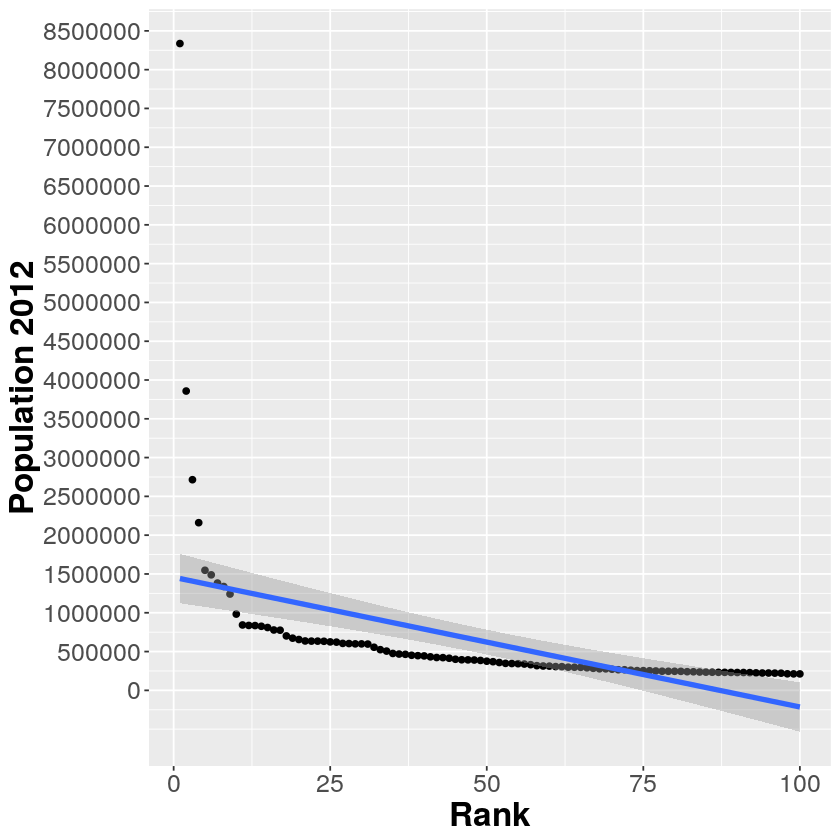

In [27]:
ggplot(CitPop, aes(x=Rank, y=Population2012)) + geom_point() + labs(x = "Rank") + labs(y = "Population 2012") +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm, size = 1.5) +   # Add linear regression lines  
  theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
        axis.title=element_text(size=20,face="bold")) +
      scale_y_continuous(breaks=seq(0,10000000,500000))


In [28]:
# we use the Housing dataset in the Ecdata Package in R

#?Housing
summary(Housing)


     price           lotsize         bedrooms        bathrms     
 Min.   : 25000   Min.   : 1650   Min.   :1.000   Min.   :1.000  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:2.000   1st Qu.:1.000  
 Median : 62000   Median : 4600   Median :3.000   Median :1.000  
 Mean   : 68122   Mean   : 5150   Mean   :2.965   Mean   :1.286  
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :190000   Max.   :16200   Max.   :6.000   Max.   :4.000  
    stories      driveway  recroom   fullbase  gashw     airco    
 Min.   :1.000   no : 77   no :449   no :355   no :521   no :373  
 1st Qu.:1.000   yes:469   yes: 97   yes:191   yes: 25   yes:173  
 Median :2.000                                                    
 Mean   :1.808                                                    
 3rd Qu.:2.000                                                    
 Max.   :4.000                                                    
    garagepl      prefarea 
 Min.   :0.0000   no :418  
 1st Qu.:0.00

In [29]:
# Create a dataframe h1 which has the four columns from Housing - price, lotsize, bedrooms, and bathrms 
h1 <- data.frame(Housing$price, Housing$lotsize, Housing$bedrooms, Housing$bathrms)

head(h1,15)  # in case you want to view the first 15 records in h1


Housing.price,Housing.lotsize,Housing.bedrooms,Housing.bathrms
42000,5850,3,1
38500,4000,2,1
49500,3060,3,1
60500,6650,3,1
61000,6360,2,1
66000,4160,3,1
66000,3880,3,2
69000,4160,3,1
83800,4800,3,1
88500,5500,3,2


In [30]:
#create natural log of the variables price and lotsize and also the square of lotsize and add these new variables to h1

h1 <- h1 %>%
  mutate(Ln_price = log(Housing.price)) %>%
  mutate(Ln_lotsize = log(Housing.lotsize)) %>%
  mutate(lot_square = Housing.lotsize*Housing.lotsize) 
         
head(h1,15) # in case you want to view the first 15 records in h1
 

Housing.price,Housing.lotsize,Housing.bedrooms,Housing.bathrms,Ln_price,Ln_lotsize,lot_square
42000,5850,3,1,10.64542,8.674197,34222500
38500,4000,2,1,10.55841,8.294050,16000000
49500,3060,3,1,10.80973,8.026170,9363600
60500,6650,3,1,11.01040,8.802372,44222500
61000,6360,2,1,11.01863,8.757784,40449600
66000,4160,3,1,11.09741,8.333270,17305600
66000,3880,3,2,11.09741,8.263590,15054400
69000,4160,3,1,11.14186,8.333270,17305600
83800,4800,3,1,11.33619,8.476371,23040000
88500,5500,3,2,11.39076,8.612503,30250000


In [31]:
# Model A:  price = b0 + b1*lotsize  Linear-linear model

a.lm <- lm(formula = price ~ lotsize , data = Housing)
summary(a.lm)



Call:
lm(formula = price ~ lotsize, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-69551 -14626  -2858   9752 106901 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.414e+04  2.491e+03    13.7   <2e-16 ***
lotsize     6.599e+00  4.458e-01    14.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22570 on 544 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2858 
F-statistic: 219.1 on 1 and 544 DF,  p-value: < 2.2e-16


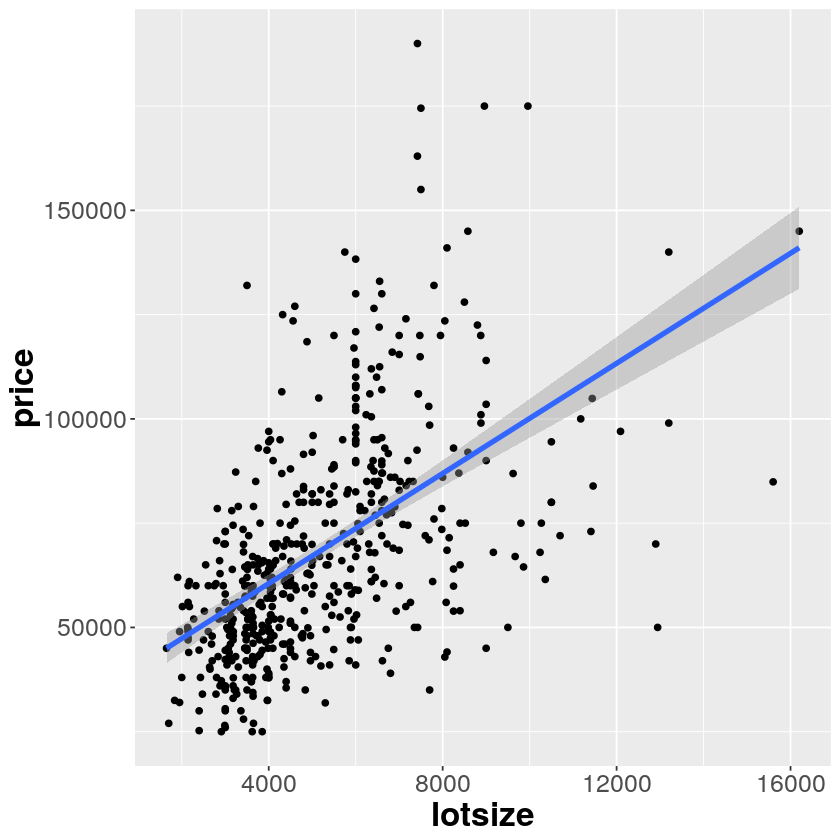

In [32]:
# Model A: Scatter Plot with regression line 

ggplot(Housing, aes(x=lotsize, y=price)) + geom_point() + labs(x = "lotsize") + labs(y = "price") +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm, size = 1.5) +   # Add linear regression lines  
        theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
        axis.title=element_text(size=20,face="bold"))



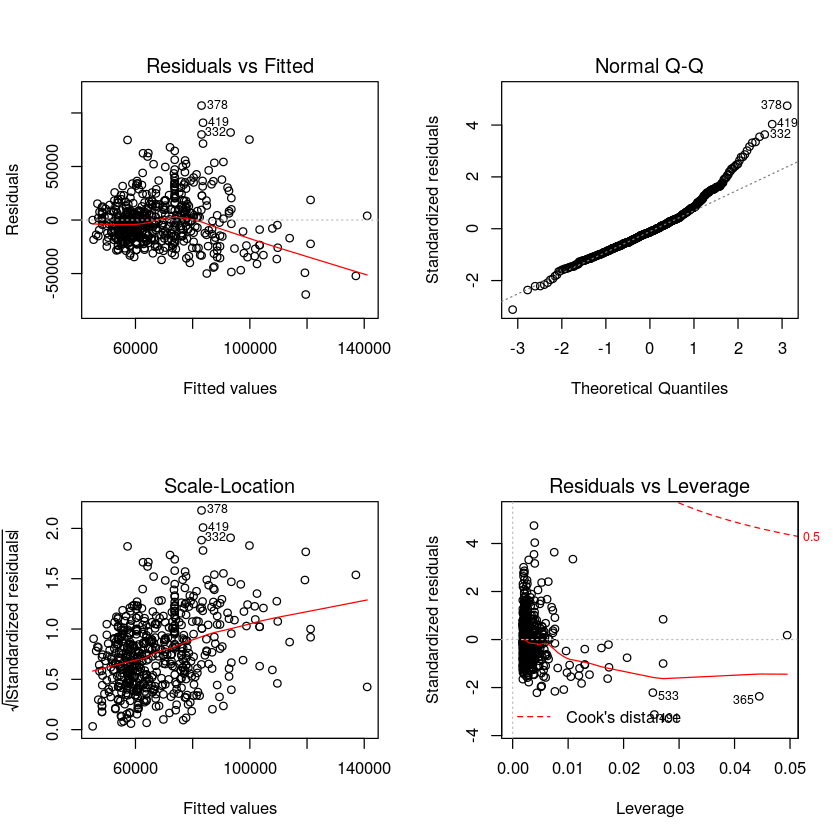

In [33]:
# Model A:  Diagnostics Plots
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(a.lm) # Plot # plots the four diagnostics plots


In [34]:
# Model B:  price = b0 + b1*log(lotsize)  Linear-Log Model

b.lm <- lm(formula = Housing.price ~ Ln_lotsize , data = h1)
summary(b.lm)



Call:
lm(formula = Housing.price ~ Ln_lotsize, data = h1)

Residuals:
   Min     1Q Median     3Q    Max 
-55847 -14922  -2792  10966 105108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -250728      20184  -12.42   <2e-16 ***
Ln_lotsize     37660       2381   15.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22120 on 544 degrees of freedom
Multiple R-squared:  0.315,	Adjusted R-squared:  0.3137 
F-statistic: 250.1 on 1 and 544 DF,  p-value: < 2.2e-16


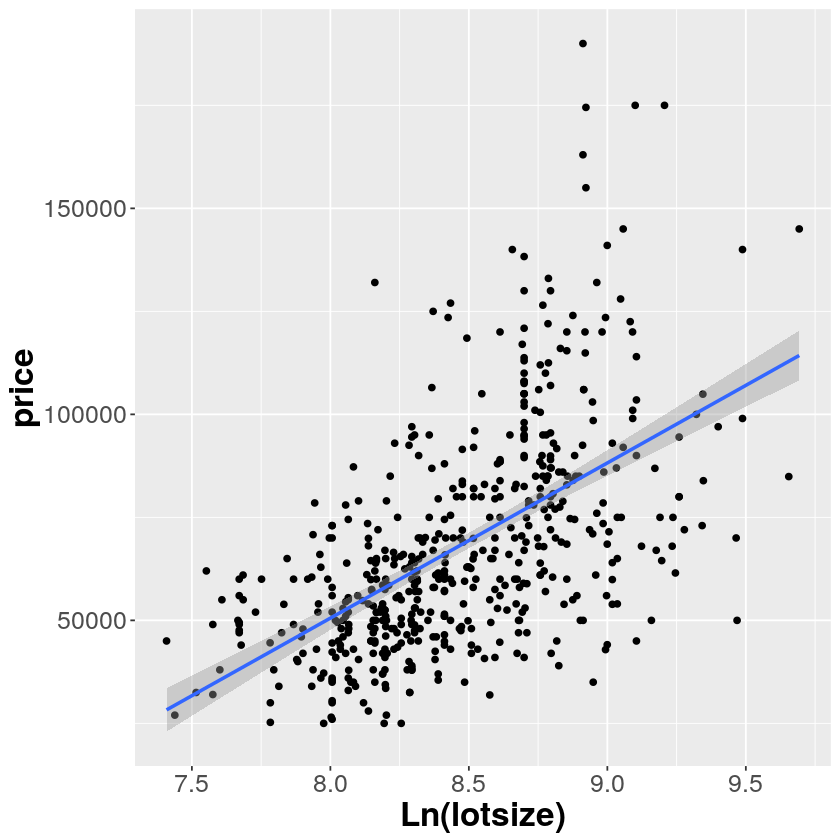

In [35]:
# Model B: Scatter Plot with regression line 
ggplot(h1, aes(x=Ln_lotsize, y=Housing.price)) + geom_point() + labs(x = "Ln(lotsize)") + labs(y = "price") +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    # Don't add shaded confidence region
              fullrange=TRUE) + # Extend regression lines
        theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
        axis.title=element_text(size=20,face="bold"))


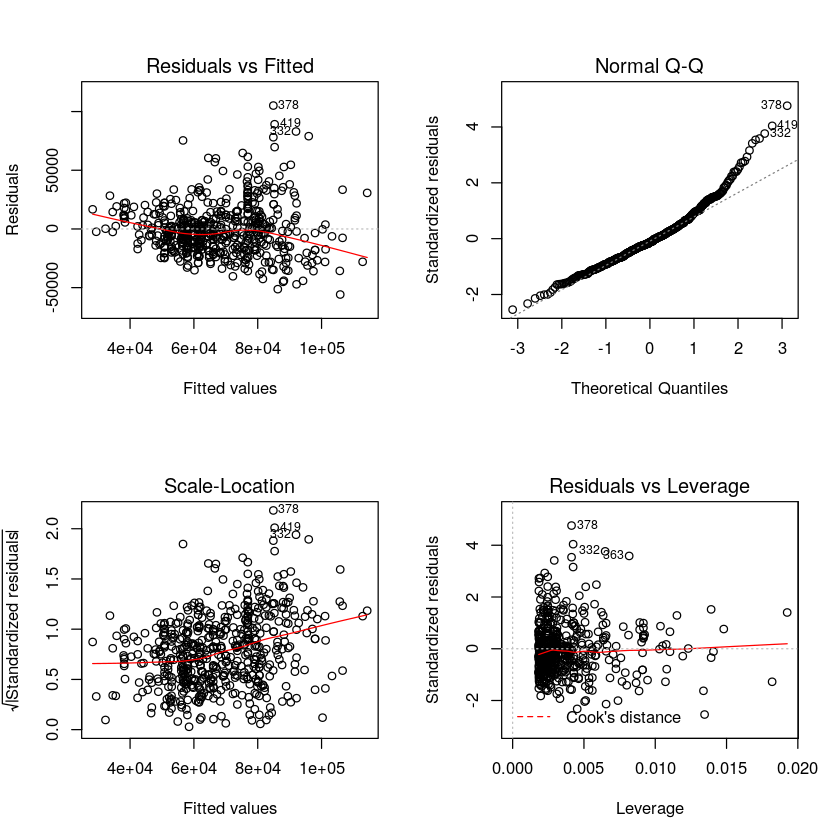

In [36]:
# Model B:  Diagnostics Plots
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(b.lm)


In [37]:
# Model C:  log(price) = b0 + b1*lotsize  Log-Linear Model

c.lm <- lm(formula = Ln_price ~ Housing.lotsize , data = h1)
summary(c.lm)



Call:
lm(formula = Ln_price ~ Housing.lotsize, data = h1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96513 -0.20552  0.00396  0.19758  0.88531 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.058e+01  3.451e-02  306.51   <2e-16 ***
Housing.lotsize 9.315e-05  6.177e-06   15.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3127 on 544 degrees of freedom
Multiple R-squared:  0.2947,	Adjusted R-squared:  0.2935 
F-statistic: 227.4 on 1 and 544 DF,  p-value: < 2.2e-16


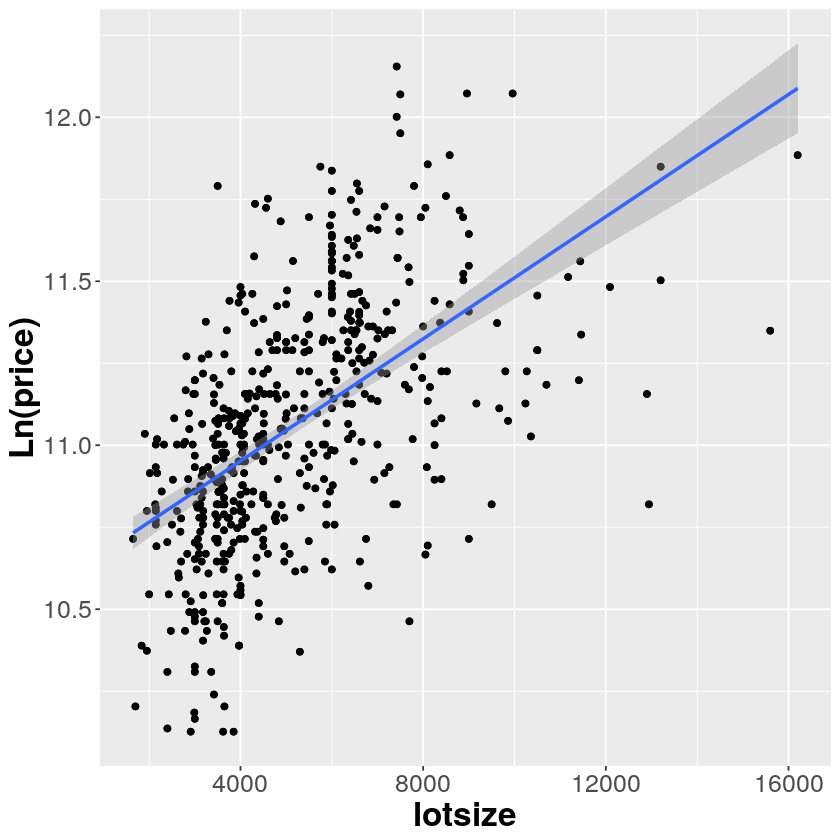

In [38]:
# Model C: Scatter Plot with regression line 
ggplot(h1, aes(x=Housing.lotsize, y=Ln_price)) + geom_point() + geom_point() + labs(x = "lotsize") + labs(y = "Ln(price)") +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    # Don't add shaded confidence region
              fullrange=TRUE) + # Extend regression lines
      theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
        axis.title=element_text(size=20,face="bold"))


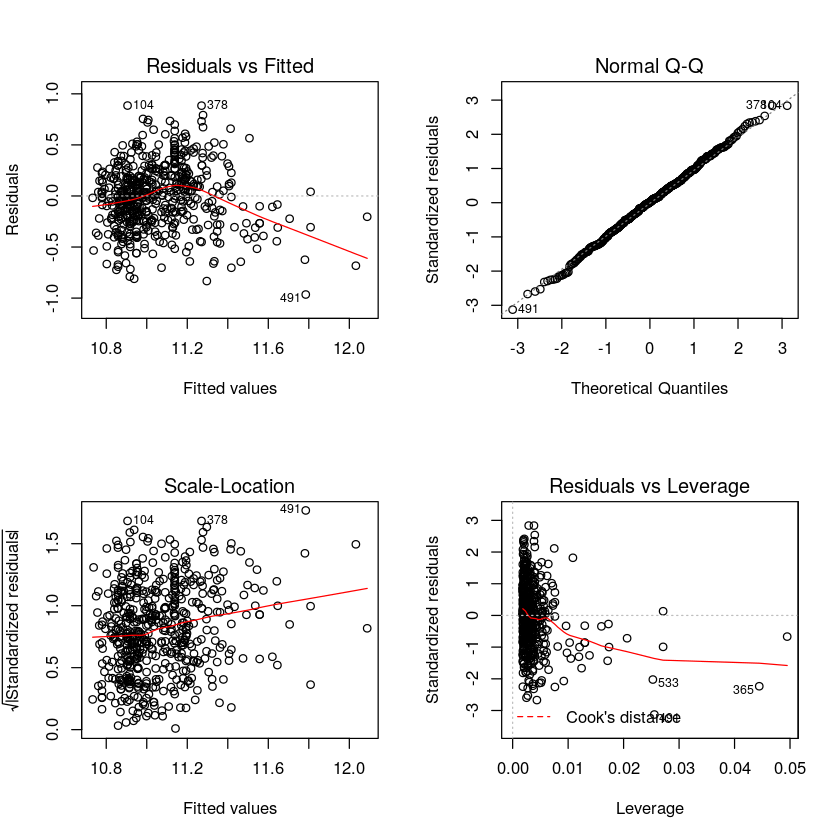

In [39]:
# Model C:  Diagnostics Plots
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(c.lm)


In [40]:
# Model D:  log(price) = b0 + b1*log(lotsize)  Log-Log Model

d.lm <- lm(formula = Ln_price ~ Ln_lotsize , data = h1)
summary(d.lm)




Call:
lm(formula = Ln_price ~ Ln_lotsize, data = h1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85737 -0.19866  0.00396  0.19377  0.89756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.46853    0.27674   23.37   <2e-16 ***
Ln_lotsize   0.54218    0.03265   16.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3033 on 544 degrees of freedom
Multiple R-squared:  0.3364,	Adjusted R-squared:  0.3352 
F-statistic: 275.8 on 1 and 544 DF,  p-value: < 2.2e-16


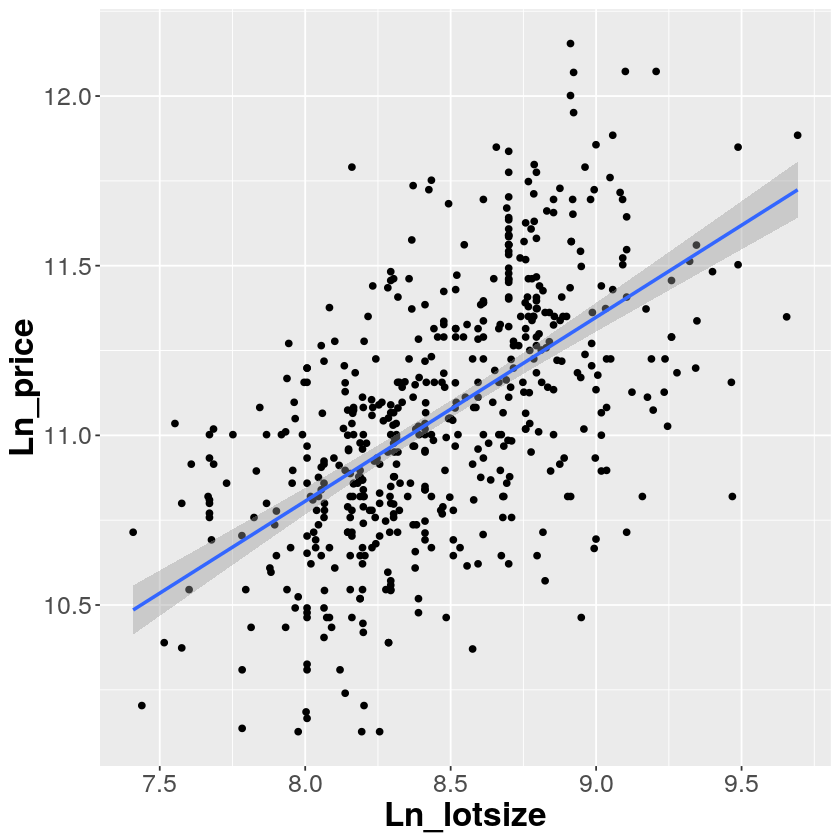

In [41]:
# Model D: Scatter Plot with regression line 
ggplot(h1, aes(x=Ln_lotsize, y=Ln_price)) + geom_point() +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    # Don't add shaded confidence region
              fullrange=TRUE) + # Extend regression lines
  theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
      axis.title=element_text(size=20,face="bold"))



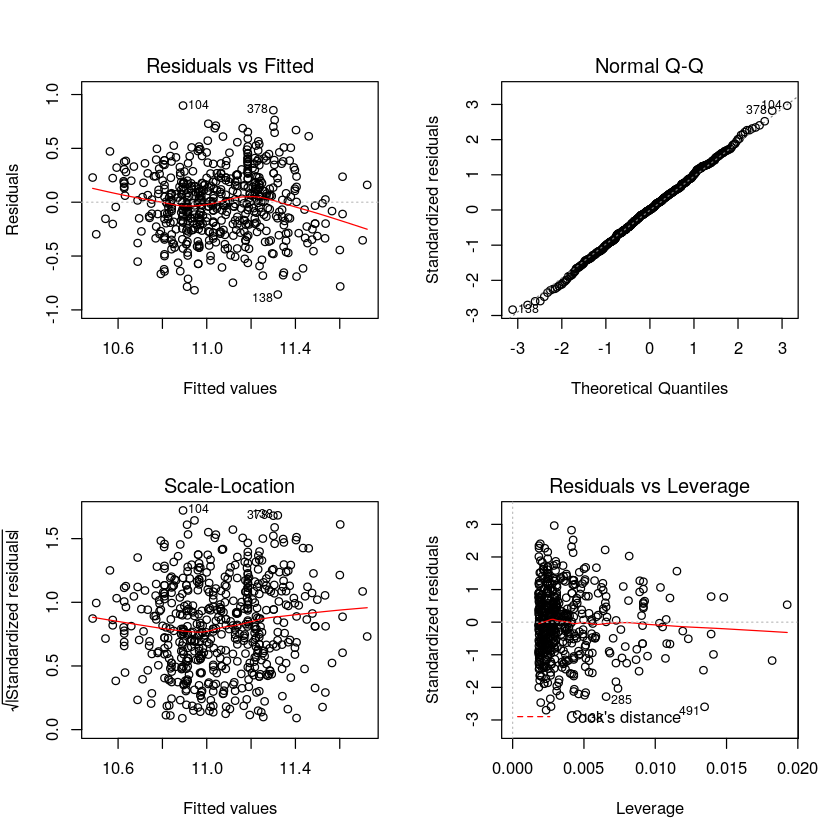

In [42]:
# Model D:  Diagnostics Plots
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(d.lm) # Plot # plots the four diagnostics plots



In [43]:
# Model E:  price = b0 + b1*lotsize + b2*lotsize2  Polynomial (Quadratic) Model

e.lm <- lm(formula = Housing.price ~ Housing.lotsize + lot_square, data = h1)
summary(e.lm)




Call:
lm(formula = Housing.price ~ Housing.lotsize + lot_square, data = h1)

Residuals:
   Min     1Q Median     3Q    Max 
-53363 -14335  -3069  10100 103142 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.134e+04  4.892e+03   2.317   0.0209 *  
Housing.lotsize  1.481e+01  1.589e+00   9.317  < 2e-16 ***
lot_square      -6.238e-04  1.162e-04  -5.370 1.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22010 on 543 degrees of freedom
Multiple R-squared:  0.323,	Adjusted R-squared:  0.3205 
F-statistic: 129.5 on 2 and 543 DF,  p-value: < 2.2e-16
